In [1]:
import numpy as np
import sympy as sp

#### **Exercise 1:**
Create a function returning the first N terms of the tailor series of the function without using the sympy series function.

In [3]:
def taylor(expr,N):
    h = sp.symbols('h')
    final = 0

    for i in range(N+1): 
        final += sp.diff(expr, x,i).subs(x,h) * (x-h)**i/sp.factorial(i)
    return final

x, h = sp.symbols('x h')
expr = sp.sin(x)

taylor(expr,5)

(-h + x)**5*cos(h)/120 + (-h + x)**4*sin(h)/24 - (-h + x)**3*cos(h)/6 - (-h + x)**2*sin(h)/2 + (-h + x)*cos(h) + sin(h)

In [9]:
#Compare with the built-in
h = sp.symbols('h')
sp.sin(x).series(x, x0=h, n=6)

sin(h) + (-h + x)*cos(h) - (-h + x)**2*sin(h)/2 - (-h + x)**3*cos(h)/6 + (-h + x)**4*sin(h)/24 + (-h + x)**5*cos(h)/120 + O((-h + x)**6, (x, h))

#### **Exercise 2:**

Write a matrix multiplication function using lists ("manually", using the matrix multiplication formula) and another one using numpy arrays (call matmul function). Time them both. 

In [125]:
A = [[1,77,3],[4,5,6],[7,8,9]]
B = [[ 5., 10.],[15., 20.],[25., 30.]]

A_arr = np.array(A)
B_arr = np.array(B)

def matrix_mul(a, b):
    return [[sum(el_a * el_b for el_a, el_b in zip(row_a, col_b)) for col_b in zip(*b)]
        for row_a in a]

%timeit matrix_mul(A,B)
%timeit np.matmul(A_arr,B_arr)

9.96 µs ± 210 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.6 µs ± 243 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [126]:
matrix_mul(A,B)

[[1235.0, 1640.0], [245.0, 320.0], [380.0, 500.0]]

In [127]:
np.matmul(A_arr,B_arr)

array([[1235., 1640.],
       [ 245.,  320.],
       [ 380.,  500.]])

#### **Execrise 3:**

Consider the following example. Change functions in it to plot something different from `sin` in each panel. Add x and y labels to each panel. Experiment till this looks nice enough for an article. Save the output. 

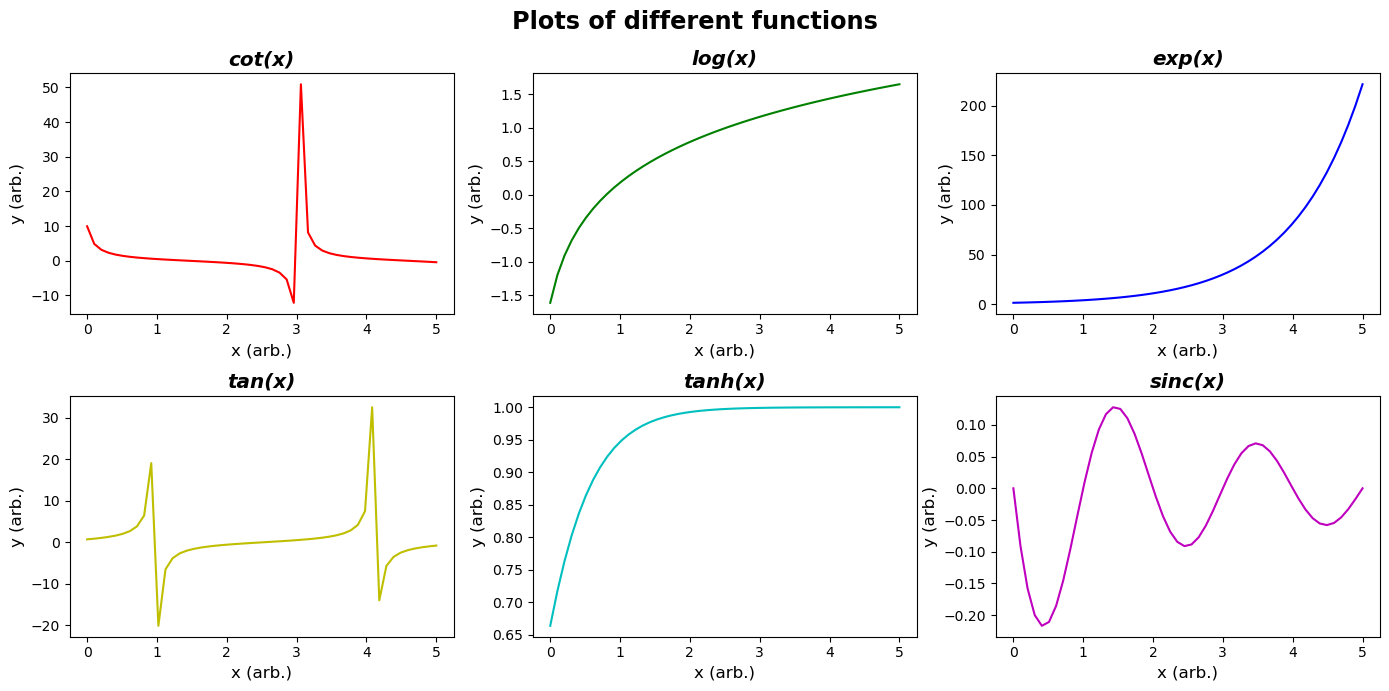

In [31]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0,5,50)
y1 = 1/np.tan(x + 0.1)
y2 = np.log(x + 0.2)
y3 = np.exp(x + 0.4)
y4 = np.tan(x + 0.6)
y5 = np.tanh(x + 0.8)
y6 = np.sinc(x + 1)

# now we decide the actual figure size in inches
fig = plt.figure(figsize=(14,7))

plt.suptitle('Plots of different functions',fontweight='bold', fontsize='xx-large')
plt.subplots_adjust(hspace=0.5, top=0.8) 
# create subplots 231 means make a 2x3 grid and this is the first plot
plt.subplot(231)
#these are here to show that you can do the same here as for a single plot
plt.title(r'cot(x)',fontsize = 'x-large',fontstyle='italic',fontweight='bold')
plt.ylabel('y (arb.)',fontsize = 'large',fontstyle='normal',fontweight = 'medium')
plt.xlabel('x (arb.)',fontsize = 'large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y1,color='r')

plt.subplot(232)
plt.title(r'log(x)',fontsize = 'x-large',fontstyle='italic',fontweight='bold')
plt.ylabel('y (arb.)',fontsize = 'large',fontstyle='normal',fontweight = 'medium')
plt.xlabel('x (arb.)',fontsize = 'large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y2,color='g')

plt.subplot(233)
plt.title(r'exp(x)',fontsize = 'x-large',fontstyle='italic',fontweight='bold')
plt.ylabel('y (arb.)',fontsize = 'large',fontstyle='normal',fontweight = 'medium')
plt.xlabel('x (arb.)',fontsize = 'large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y3,color='b')

plt.subplot(234)
plt.title(r'tan(x)',fontsize = 'x-large',fontstyle='italic',fontweight='bold')
plt.ylabel('y (arb.)',fontsize = 'large',fontstyle='normal',fontweight = 'medium')
plt.xlabel('x (arb.)',fontsize = 'large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y4,color='y')

plt.subplot(235)
plt.title(r'tanh(x)',fontsize = 'x-large',fontstyle='italic',fontweight='bold')
plt.ylabel('y (arb.)',fontsize = 'large',fontstyle='normal',fontweight = 'medium')
plt.xlabel('x (arb.)',fontsize = 'large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y5,color='c')

plt.subplot(236)
plt.title(r'sinc(x)',fontsize = 'x-large',fontstyle='italic',fontweight='bold')
plt.ylabel('y (arb.)',fontsize = 'large',fontstyle='normal',fontweight = 'medium')
plt.xlabel('x (arb.)',fontsize = 'large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y6,color='m')
# removed extra white space
plt.tight_layout()
#plt.show()

#### **Exercise 4:**
Plot the recaman sequence in the following way:

Add a semi-circular arc from $a_{n}$ to $a_{n-1}$.

Alternate the arcs to be above and below the x-axis according to whether
    n is even or odd.

In [94]:
def recaman(N):
    rec = [0]
    i = 1
    while (i < N+1):
        a = rec[i-1] - i  
        if (a > 0) and (a not in rec):
            rec.append(a)  
        else: 
            rec.append(rec[i-1] + i ) 
        i = i + 1
    return rec

rec_list = recaman(45)

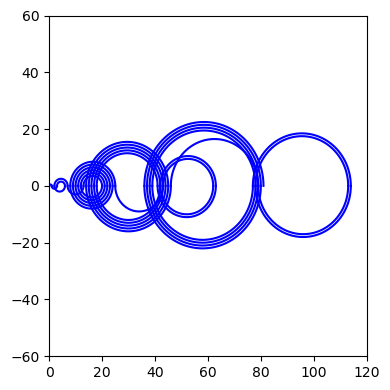

In [87]:
fig = plt.figure(figsize=(4,4))

for i in range(len(rec_list)-1):
    diameter = abs(rec_list[i+1]-rec_list[i])
    midpoint = (rec_list[i+1]+rec_list[i])/2

    angles = np.linspace(0 * np.pi, np.pi, 100 )
    xs = np.cos(angles) * diameter/2 + midpoint
    ys = (-1)**i * np.sin(angles) * diameter/2 

    plt.plot(xs, ys, color = 'blue')

plt.xlim(0,120)
plt.ylim(-60,60)

plt.tight_layout()

#### **Exercise5:**

Plot a rainbow. Use your imagination and google to make it beautiful.

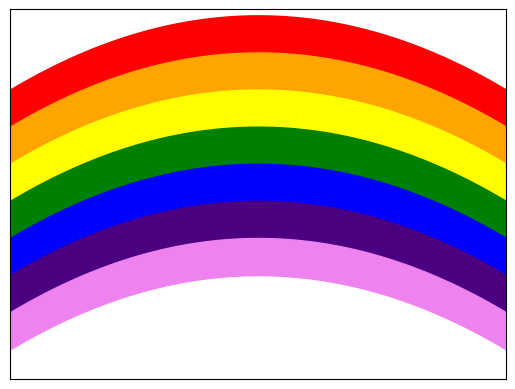

In [124]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 100, 80) 

y_old = -0.2*(x-50)**2 + 2750
for delta, color in zip([2500,2250, 2000, 1750, 1500, 1250, 1000], ["r", "orange",'yellow', "g", "b", "indigo", "violet"] ):
    y_new = -0.2*(x-50)**2 + delta
    plt.fill_between(x, y_old, y_new, color=color)
    y_old = y_new

plt.xticks([])
plt.yticks([])
plt.ylim(300, 2790)
plt.xlim(0, 100)
plt.show()

#### **Exercise6**

Plot a nice-looking 3-D torus. Do this 3 times with different styles. 

(-2.0, 2.0)

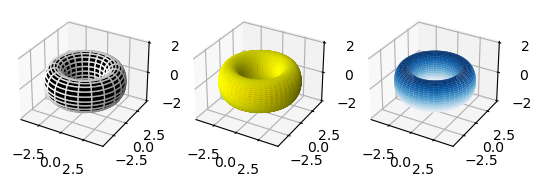

In [122]:
import numpy as np
import matplotlib.pyplot as plt

def torus_points(precision, c, a):
    phi = np.linspace(0, 2*np.pi, precision)
    theta = np.linspace(0, 2*np.pi, precision)
    phi, theta = np.meshgrid(phi, theta)
    X = (c+a*np.cos(theta))*np.cos(phi)
    Y = (c+a*np.cos(theta))*np.sin(phi)
    Z = a*np.sin(theta)
    return X, Y, Z

x, y, z = torus_points(100, 3, 1)

f, ax = plt.subplots(1, 3,subplot_kw=dict(projection="3d"))
ax[0].plot_surface(x, y, z, antialiased=True, rstride=5, cstride=5, color='k', edgecolors='w')
ax[1].plot_surface(x, y, z, antialiased=True, color='orange',edgecolors='yellow')
ax[2].plot_surface(x, y, z, antialiased=True, cmap=plt.cm.Blues)

ax[0].set_zlim(-2,2)
ax[1].set_zlim(-2,2)
ax[2].set_zlim(-2,2)